***Titanic Survival Prediction Task -Giriraju***

---





**Import Data from csv file**

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
df=pd.read_csv('/content/Titanic DS.csv')

In [56]:
df.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   Sibsp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


**Finding missing values in the data set**

In [58]:
df.isnull().sum()

Pclass        0
Survived      0
Name          0
Sex           0
Age         263
Sibsp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

We cannot drop the age column as we need to use that column for visualisation

**Imputing missing values in the data set**

In [59]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [60]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [61]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

**Checking the values after imputing**

In [62]:
df.isnull().sum()

Pclass      0
Survived    0
Name        0
Sex         0
Age         0
Sibsp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now we can see the data are cleaned (ie) No missing values

**Statistics**

In [63]:
df.describe()

,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [64]:
df['Survived'].value_counts()

0    809
1    500
Name: Survived, dtype: int64

In [65]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [66]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

**Output/Visualisation**

1. Total no of Passengers

In [67]:
Passengers=df['Name'].count()
print('Total number of Passengers are',Passengers )

Total number of Passengers are 1309


2. Number of Alive Passenger

In [68]:
Alive_Passengers=df['Survived'].value_counts()[1]
print('Number of Alive Passengers are',Alive_Passengers )

Number of Alive Passengers are 500


3. Number of Dead Passenger

In [69]:
Dead_Passengers=df['Survived'].value_counts()[0]
print('Number of Alive Passengers are',Dead_Passengers )

Number of Alive Passengers are 809


4. Total Fare Price

In [70]:
Total_Fare_price=df['Fare'].sum()
print('Total Fare Price is $',Total_Fare_price.round(2))


Total Fare Price is $ 43583.78


5. Gender based Classification

Gender based Classification is below


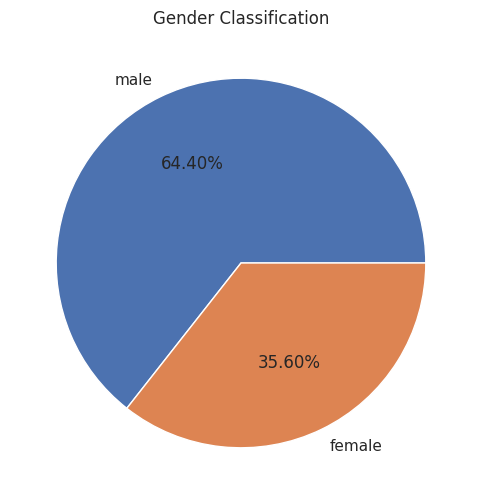

In [71]:
print("Gender based Classification is below")
gender_classification=df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_classification, labels=gender_classification.index, autopct='%0.2f%%')
plt.title("Gender Classification")
plt.show()

6. Passenger by class

Passenger by class is below


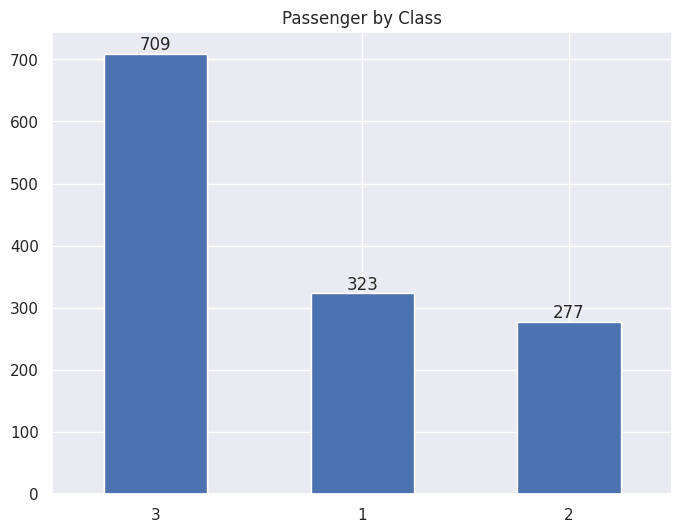

In [72]:
print("Passenger by class is below")
P_class=df['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
P_class.plot(kind='bar', rot=0)
ax = P_class.plot(kind='bar', rot=0)
plt.title("Passenger by Class")
for i, v in enumerate(P_class):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.show()

   7. Survival & Died percentage

Survival Percentage: 38.20%
Death Percentage: 61.80%


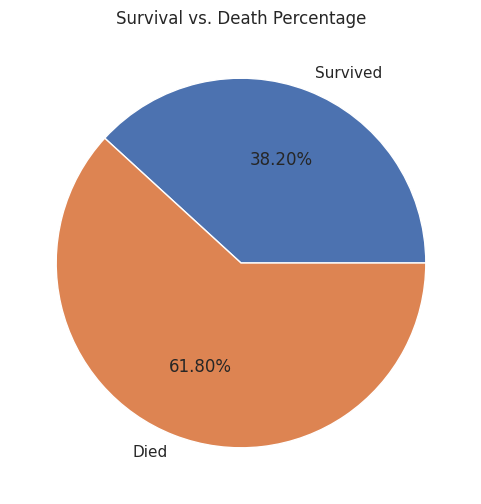

In [73]:
total_passengers = len(df)
survived_count = df['Survived'].sum()
died_count = total_passengers - survived_count

survival_percentage = (survived_count / total_passengers) * 100
death_percentage = (died_count / total_passengers) * 100

print(f"Survival Percentage: {survival_percentage:.2f}%")
print(f"Death Percentage: {death_percentage:.2f}%")

plt.figure(figsize=(6, 6))
plt.pie([survival_percentage, death_percentage], labels=['Survived', 'Died'],autopct='%0.2f%%')
plt.title("Survival vs. Death Percentage")
plt.show()

8. Survive by gender

Sex
female    339
male      161
Name: Survived, dtype: int64


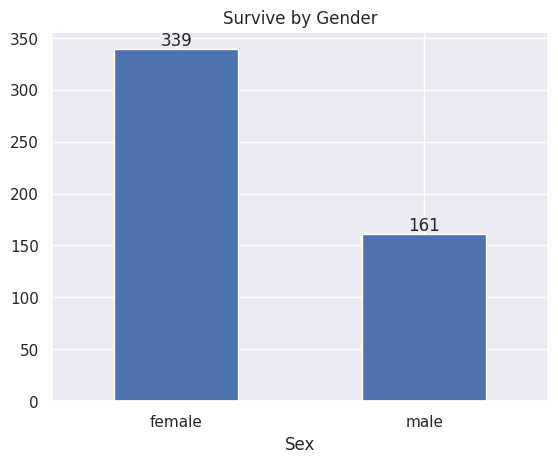

In [74]:
gender_survival = df.groupby('Sex')['Survived'].sum()

gender_survival = gender_survival.round(2)
print(gender_survival)
ax = gender_survival.plot(kind='bar', rot=0)
for i, v in enumerate(gender_survival):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
gender_survival.plot(kind='bar', rot=0)
plt.title("Survive by Gender")
plt.show()

9. Died by Gender

female    127
male      682
dtype: int64


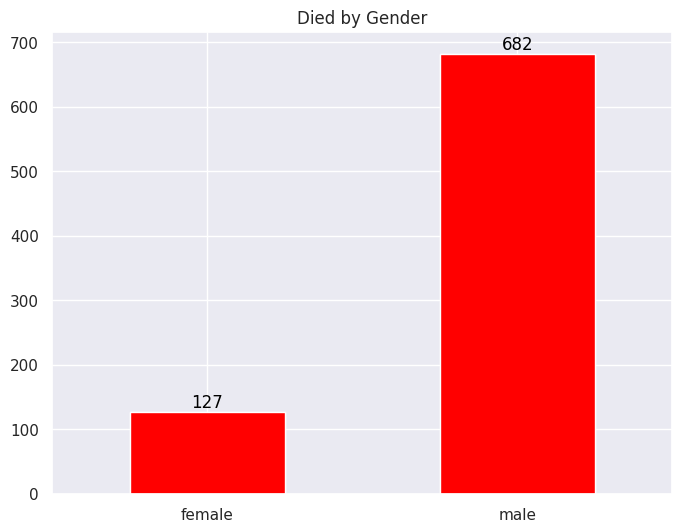

In [75]:
gender_death = gender_classification-gender_survival

gender_death = gender_death.round(2)
print(gender_death)

plt.figure(figsize=(8, 6))
ax = gender_death.plot(kind='bar', rot=0, color='red')
plt.title("Died by Gender")

# Add data labels
for i, v in enumerate(gender_death):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', color='black')

gender_death.plot(kind='bar', rot=0, color='red')
plt.title("Died by Gender")
plt.show()

10. Passenger based on Age Group

Passenger based on Age Group:


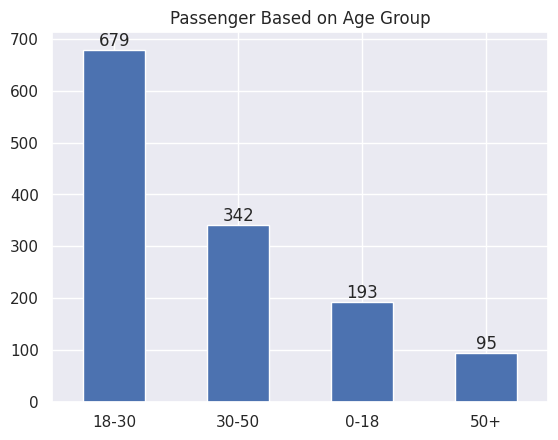

In [82]:
bins = [0, 18, 30, 50, 80]
age_labels = ['0-18', '18-30', '30-50', '50+']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=age_labels)
passengers_by_age_group = df['AgeGroup'].value_counts()

ax = passengers_by_age_group.plot(kind='bar', rot=0)
print("Passenger based on Age Group:")

for i, v in enumerate(passengers_by_age_group):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.title("Passenger Based on Age Group")
plt.show()

   **THANK YOU!!**